# 1. Детекция объектов с YOLOv8

--2025-05-31 06:40:31--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2025-05-31 06:40:31--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 172.64.147.154, 104.18.40.102, 2606:4700:4400::ac40:939a, ...
Connecting to www.ultralytics.com (www.ultralytics.com)|172.64.147.154|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg [following]
--2025-05-31 06:40:31--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request

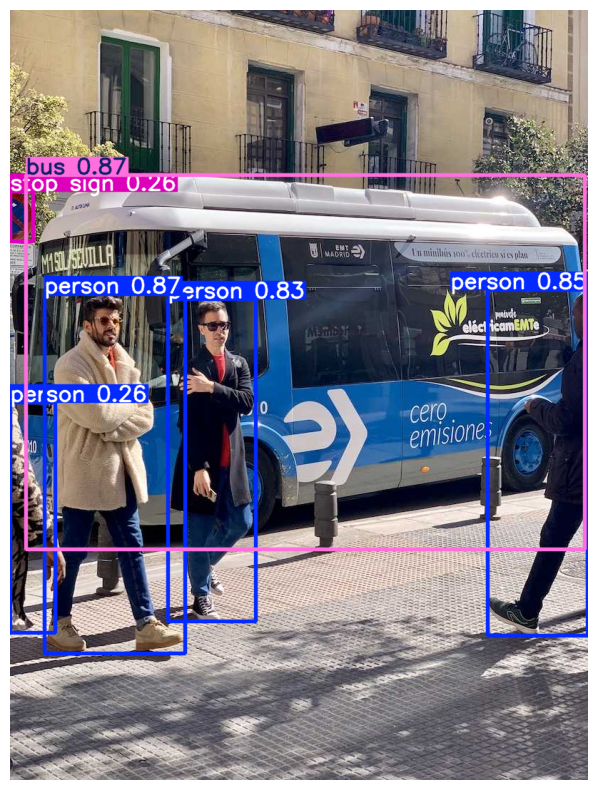

In [ ]:
!pip install ultralytics

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Загрузка предобученной модели YOLOv8n
model = YOLO('yolov8n.pt')

# Загрузка тестового изображения
!wget https://ultralytics.com/images/bus.jpg -O bus.jpg

# Выполнение детекции
results = model('bus.jpg')

# Визуализация результатов
for r in results:
    im_array = r.plot()  # изображение с bounding boxes
    im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.axis('off')
plt.show()

# 2. Применение предобученных моделей (Transfer Learning)

In [ ]:
# Использование предобученной модели ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Загрузка модели с весами ImageNet
model = ResNet50(weights='imagenet')

# Загрузка и подготовка изображения
img_path = '/content/bus.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Предсказание
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n03769881', 'minibus', np.float32(0.9079739)), ('n03977966', 'police_van', np.float32(0.03394901)), ('n03445924', 'golfcart', np.float32(0.033726797))]


# 3. Распознавание лиц с OpenCV

In [26]:
# Распознавание лиц с использованием Haar каскадов
import cv2
from google.colab.patches import cv2_imshow
import os

# Загрузка предобученного классификатора
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Загрузка изображения
!wget https://i.ytimg.com/vi/jaCQGR2MCLc/maxresdefault.jpg -O face.jpg

# Чтение изображения
img = cv2.imread('face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Детекция лиц
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Рисование прямоугольников вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Отображение результата
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

# 4. Классификация изображений с помощью CNN (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


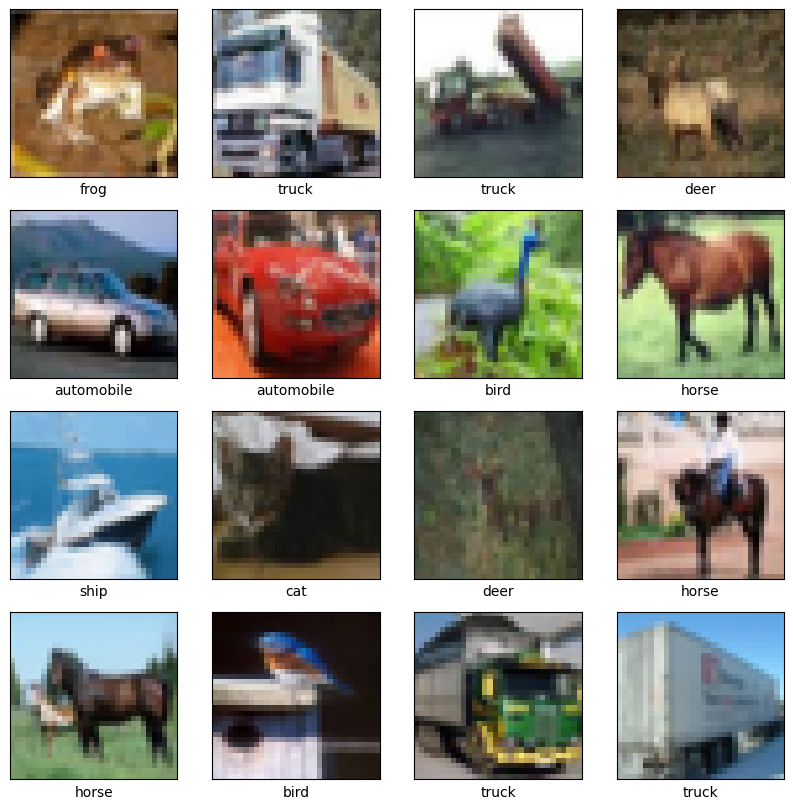

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.3401 - loss: 1.7834 - val_accuracy: 0.5498 - val_loss: 1.2517
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.5687 - loss: 1.2029 - val_accuracy: 0.6049 - val_loss: 1.1238
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.6435 - loss: 1.0104 - val_accuracy: 0.6440 - val_loss: 1.0091
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6780 - loss: 0.9152 - val_accuracy: 0.6609 - val_loss: 0.9747
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 49ms/step - accuracy: 0.7055 - loss: 0.8389 - val_accuracy: 0.6934 - val_loss: 0.8870
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.7342 - loss: 0.7627 - val_accuracy: 0.6907 - val_loss: 0.8933
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7497 - loss: 0.7112 - val_accuracy: 0.6893 - val_loss: 0.8910
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7669 -

In [ ]:
# Импорт библиотек
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Загрузка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализация пикселей к диапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Определение классов
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Визуализация нескольких изображений
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Создание модели CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Компиляция и обучение модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Оценка модели
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')